# U1T5 Mobilidade entorno da UFRN


In [30]:
!pip install osmnx networkx matplotlib

In [2]:
!pip install nxviz

In [6]:
import networkx as nx
import nxviz as nv
from nxviz import annotate, highlights
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib as mpl

/usr/local/lib/python3.10/dist-packages/nxviz/__init__.py:18: UserWarning: 
nxviz has a new API! Version 0.7.4 onwards, the old class-based API is being
deprecated in favour of a new API focused on advancing a grammar of network
graphics. If your plotting code depends on the old API, please consider
pinning nxviz at version 0.7.4, as the new API will break your old code.

To check out the new API, please head over to the docs at
https://ericmjl.github.io/nxviz/ to learn more. We hope you enjoy using it!

(This deprecation message will go away in version 1.0.)

  warnings.warn(


#Extrair Dados Do Bairros: Nova Descoberta, Potilândia e Morro Branco

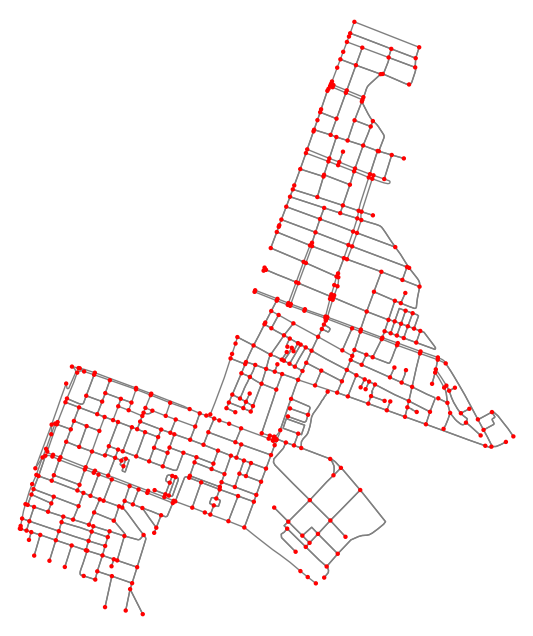

In [11]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt

bairros = ["Nova Descoberta, Natal, RN","Potilandia, Natal, RN","Morro Branco, Natal, RN"]

rede_bairros = ox.graph_from_place(bairros, network_type="all")

# Exibir o grafo
fig, ax = ox.plot_graph(rede_bairros, node_size=10, node_color='red', edge_color='gray', bgcolor='white')
plt.show()

Top 10 nós por Degree Centrality:
Nó: 383996758, Degree Centrality: 0.0075
Nó: 502752731, Degree Centrality: 0.0075
Nó: 503422377, Degree Centrality: 0.0075
Nó: 503422407, Degree Centrality: 0.0075
Nó: 503787930, Degree Centrality: 0.0075
Nó: 503787951, Degree Centrality: 0.0075
Nó: 503787994, Degree Centrality: 0.0075
Nó: 503787997, Degree Centrality: 0.0075
Nó: 503788009, Degree Centrality: 0.0075
Nó: 503792706, Degree Centrality: 0.0075


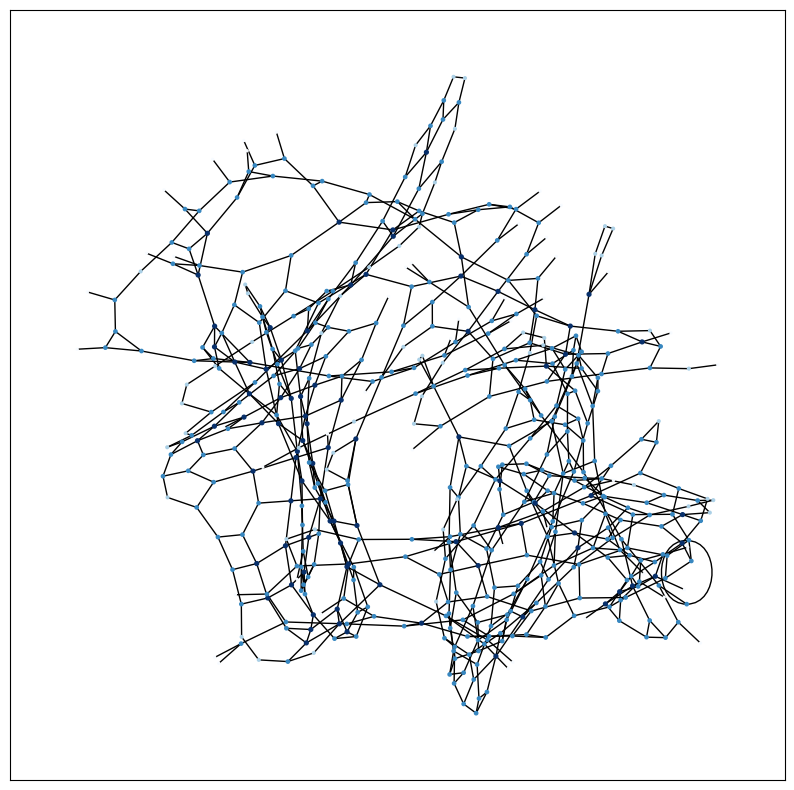

In [45]:
rede_bairros = rede_bairros.to_undirected()
degree_centrality = nx.degree_centrality(rede_bairros)

# Ordenando os nós pela centralidade
sorted_degree_centrality = sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True)

# Exibindo os 10 principais nós por centralidade
print("Top 10 nós por Degree Centrality:")
for node, centrality in sorted_degree_centrality[:10]:
    print(f"Nó: {node}, Degree Centrality: {centrality:.4f}")

# Normalizando os valores de centralidade para ajustar o tamanho dos nós
node_sizes = [v * 1000 for v in degree_centrality.values()]  # Ajuste o multiplicador conforme necessário

plt.figure(figsize=(10, 10))
nx.draw_networkx(rede_bairros, pos=nx.spring_layout(rede_bairros), node_size=node_sizes, with_labels=False, node_color=list(degree_centrality.values()), cmap=plt.cm.Blues)


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import collections
import numpy as np

# ... (código anterior para criar rede_bairros) ...

# Calcular a sequência de graus
degree_sequence = sorted([d for n, d in rede_bairros.degree()], reverse=True)
degree_count = collections.Counter(degree_sequence)
deg, cnt = zip(*degree_count.items())

# Calcular PDF e CDF
pdf = np.array(cnt) / sum(cnt)
cdf = np.cumsum(pdf)

# Plotar PDF e CDF
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].bar(deg, pdf)
ax[0].set_title("PDF dos Graus dos Nós")
ax[0].set_xlabel

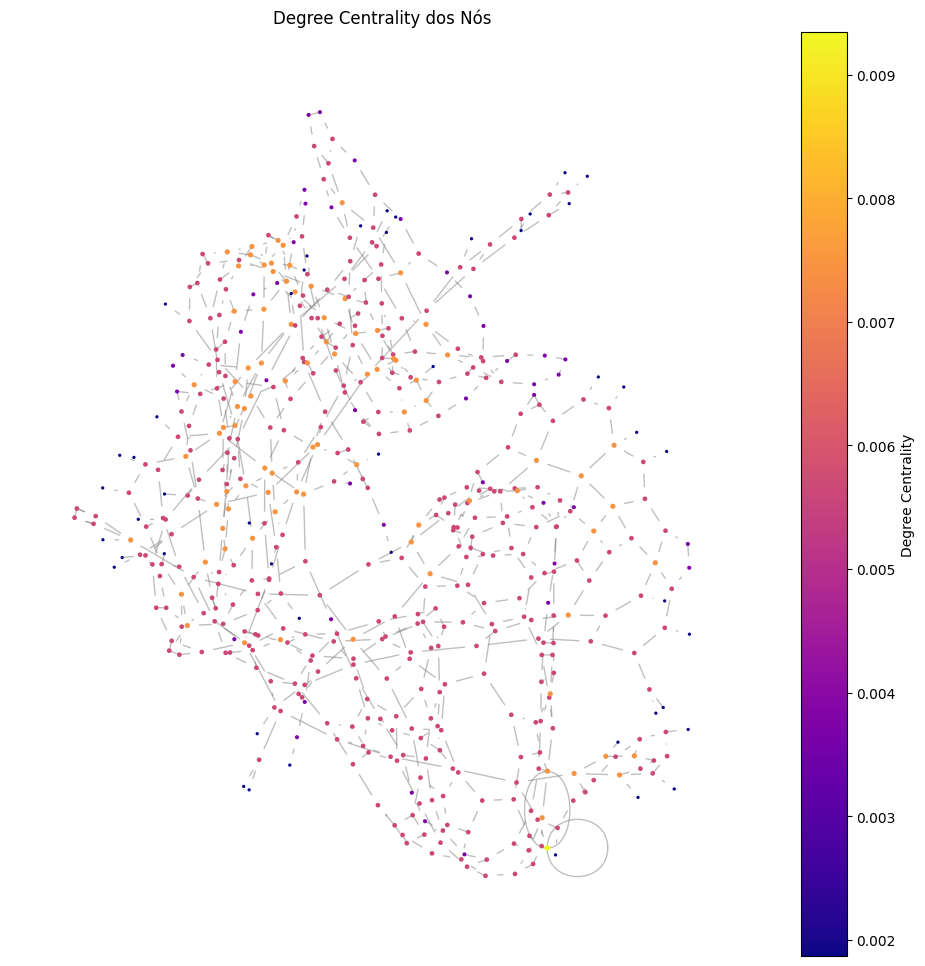

In [9]:
import networkx as nx
import matplotlib.pyplot as plt
import osmnx as ox

# Import the osmnx library to create the graph
import osmnx as ox

rede_bairros = rede_bairros.to_undirected()
degree_centrality = nx.degree_centrality(rede_bairros)

# Specify the locations for your graph
bairros = ["Nova Descoberta, Natal, RN","Potilandia, Natal, RN","Morro Branco, Natal, RN"]

# Create the graph using osmnx
rede_bairros = ox.graph_from_place(bairros, network_type="all")


# Now you can proceed with the rest of your code:
rede_bairros = rede_bairros.to_undirected()  # Convertendo para não-direcionado se ainda não estiver

# Calculando a degree centrality
degree_centrality = nx.degree_centrality(rede_bairros)

# Normalizando os valores para ajustar a visualização (tamanho e cor)
node_colors = [degree_centrality[node] for node in rede_bairros.nodes()]
node_sizes = [v * 1000 for v in degree_centrality.values()]  # Ajuste o multiplicador conforme necessário

# Configurando a visualização
fig, ax = plt.subplots(figsize=(12, 12)) # Create a figure and an axes object explicitly.
pos = nx.spring_layout(rede_bairros)  # ou use uma posição específica se tiver coordenadas geográficas

# Desenhando as arestas
nx.draw_networkx_edges(rede_bairros, pos, edge_color="gray", alpha=0.5, ax=ax) # Pass the ax object to the drawing functions

# Desenhando os nós com cores de acordo com a centralidade
nodes = nx.draw_networkx_nodes(rede_bairros, pos, node_size=node_sizes, node_color=node_colors, cmap=plt.cm.plasma, ax=ax) # Pass the ax object to the drawing functions


plt.title("Degree Centrality dos Nós")
plt.colorbar(nodes,  label="Degree Centrality", ax=ax) # Pass the ax object and mappable (nodes) to the colorbar function
plt.axis("off")
plt.show()

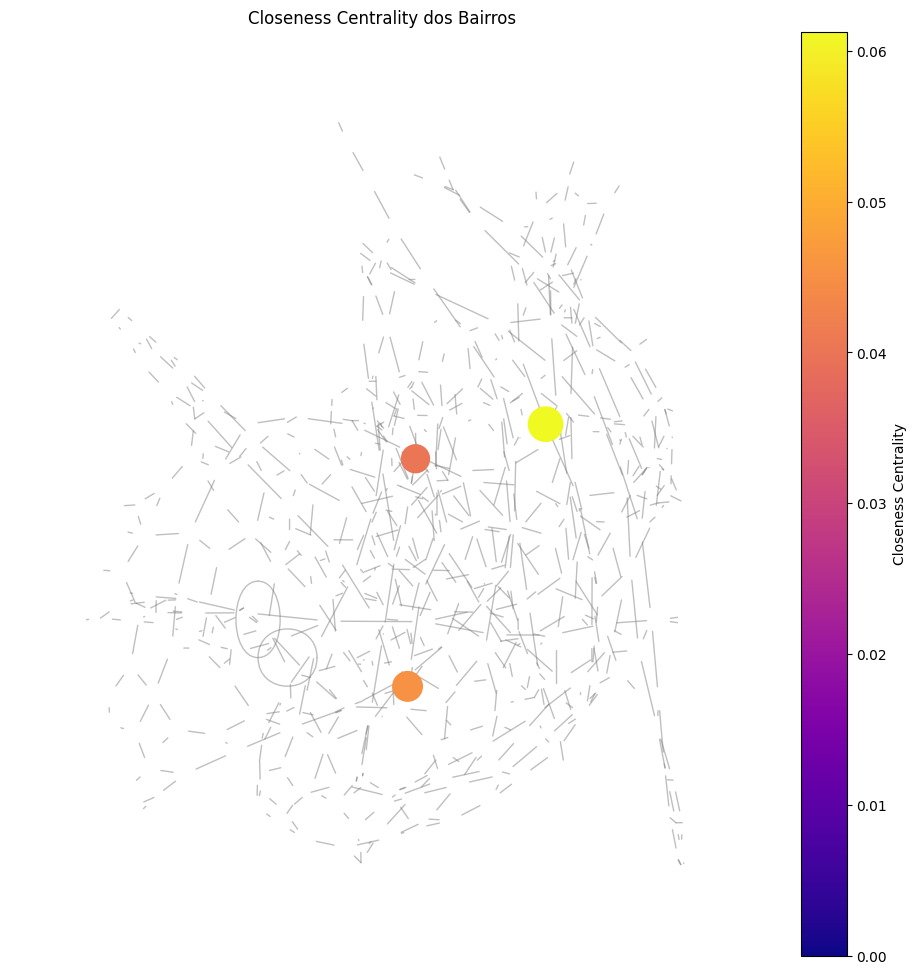

Nó (Bairro): 1430581328, Closeness Centrality: 0.0613
Nó (Bairro): 1251037570, Closeness Centrality: 0.0453
Nó (Bairro): 526590673, Closeness Centrality: 0.0403


In [13]:
import networkx as nx
import matplotlib.pyplot as plt
import osmnx as ox

# Specify the locations for your graph
bairros = ["Nova Descoberta, Natal, RN", "Potilandia, Natal, RN", "Morro Branco, Natal, RN"]

# Create the graph using osmnx
rede_bairros = ox.graph_from_place(bairros, network_type="all")
rede_bairros = rede_bairros.to_undirected()

# 1. Encontrar os nós correspondentes aos bairros:
nodes_bairros = []
for bairro in bairros:
    # Use a geocodificação para encontrar as coordenadas do bairro
    gdf = ox.geocode_to_gdf(bairro)
    # Extraia as coordenadas do centroide do polígono
    centroid = gdf['geometry'].iloc[0].centroid
    # Encontre o nó mais próximo no grafo usando as coordenadas do centroide
    nearest_node = ox.nearest_nodes(rede_bairros, centroid.x, centroid.y)
    nodes_bairros.append(nearest_node)

# 2. Calcular Closeness Centrality apenas para os nós dos bairros:
closeness_centrality = nx.closeness_centrality(rede_bairros)  # Calcula para todos os nós
closeness_centrality_bairros = {node: closeness_centrality[node] for node in nodes_bairros} # Filtra para os nós dos bairros

# Normalizando os valores para ajustar a visualização (tamanho e cor)
node_colors = [closeness_centrality_bairros.get(node, 0) for node in rede_bairros.nodes()]  # Cor por centralidade do bairro, 0 para outros
node_sizes = [closeness_centrality_bairros.get(node, 0) * 10000 for node in rede_bairros.nodes()]  # Tamanho por centralidade do bairro, 0 para outros

# Configurando a visualização
fig, ax = plt.subplots(figsize=(12, 12))
pos = nx.spring_layout(rede_bairros)

# Desenhando as arestas
nx.draw_networkx_edges(rede_bairros, pos, edge_color="gray", alpha=0.5, ax=ax)

# Desenhando os nós com cores de acordo com a centralidade dos bairros
nodes = nx.draw_networkx_nodes(rede_bairros, pos, node_size=node_sizes, node_color=node_colors, cmap=plt.cm.plasma, ax=ax)

plt.title("Closeness Centrality dos Bairros")
plt.colorbar(nodes, label="Closeness Centrality", ax=ax)
plt.axis("off")
plt.show()

# Exibindo os valores de Closeness Centrality dos bairros:
for node, centrality in closeness_centrality_bairros.items():
    print(f"Nó (Bairro): {node}, Closeness Centrality: {centrality:.4f}")

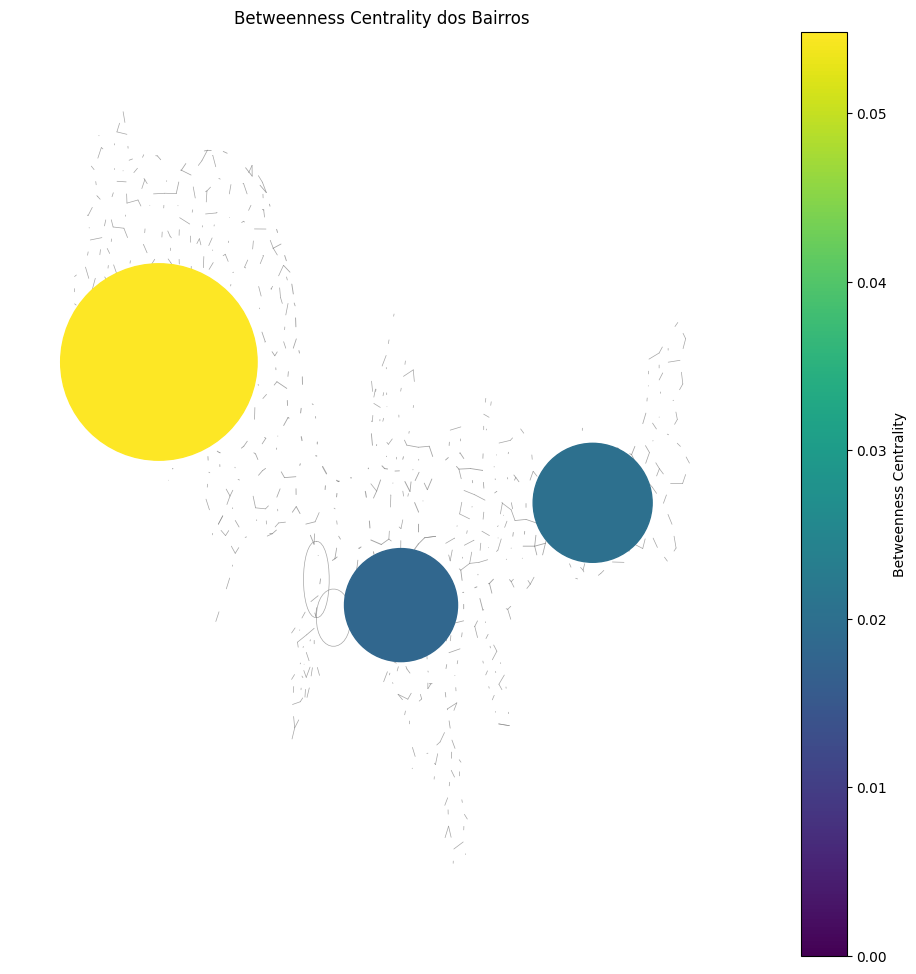

Nó (Bairro): 1430581328, Betweenness Centrality: 0.0182
Nó (Bairro): 1251037570, Betweenness Centrality: 0.0548
Nó (Bairro): 526590673, Betweenness Centrality: 0.0201


In [15]:
import networkx as nx
import matplotlib.pyplot as plt
import osmnx as ox

# Specify the locations for your graph
bairros = ["Nova Descoberta, Natal, RN", "Potilandia, Natal, RN", "Morro Branco, Natal, RN"]

# Create the graph using osmnx
rede_bairros = ox.graph_from_place(bairros, network_type="all")
rede_bairros = rede_bairros.to_undirected()

# 1. Encontrar os nós correspondentes aos bairros:
nodes_bairros = []
for bairro in bairros:
    # Use a geocodificação para encontrar as coordenadas do bairro
    gdf = ox.geocode_to_gdf(bairro)
    # Extraia as coordenadas do centroide do polígono
    centroid = gdf['geometry'].iloc[0].centroid
    # Encontre o nó mais próximo no grafo usando as coordenadas do centroide
    nearest_node = ox.nearest_nodes(rede_bairros, centroid.x, centroid.y)
    nodes_bairros.append(nearest_node)

# 2. Calcular Betweenness Centrality apenas para os nós dos bairros:
betweenness_centrality = nx.betweenness_centrality(rede_bairros)  # Calcula para todos os nós
betweenness_centrality_bairros = {node: betweenness_centrality[node] for node in nodes_bairros} # Filtra para os nós dos bairros

# Normalizando os valores para ajustar a visualização (tamanho e cor)
node_colors = [betweenness_centrality_bairros.get(node, 0) for node in rede_bairros.nodes()]  # Cor por centralidade do bairro, 0 para outros

# Ajustando o tamanho dos nós para melhor visualização
max_centrality = max(betweenness_centrality_bairros.values())
node_sizes = [betweenness_centrality_bairros.get(node, 0) * 20000 / max_centrality for node in rede_bairros.nodes()]


# Configurando a visualização com layout kamada_kawai_layout
fig, ax = plt.subplots(figsize=(12, 12))
pos = nx.kamada_kawai_layout(rede_bairros)  # Using kamada_kawai_layout for better node distribution

# Desenhando as arestas com espessura variável
edge_widths = [0.5 + (betweenness_centrality.get(u, 0) + betweenness_centrality.get(v, 0)) / 2 for u, v in rede_bairros.edges()]
nx.draw_networkx_edges(rede_bairros, pos, edge_color="gray", alpha=0.7, width=edge_widths, ax=ax)

# Desenhando os nós com cores de acordo com a centralidade dos bairros
nodes = nx.draw_networkx_nodes(rede_bairros, pos, node_size=node_sizes, node_color=node_colors, cmap=plt.cm.viridis, ax=ax)

plt.title("Betweenness Centrality dos Bairros")
plt.colorbar(nodes, label="Betweenness Centrality", ax=ax)
plt.axis("off")
plt.show()

# Exibindo os valores de Betweenness Centrality dos bairros:
for node, centrality in betweenness_centrality_bairros.items():
    print(f"Nó (Bairro): {node}, Betweenness Centrality: {centrality:.4f}")

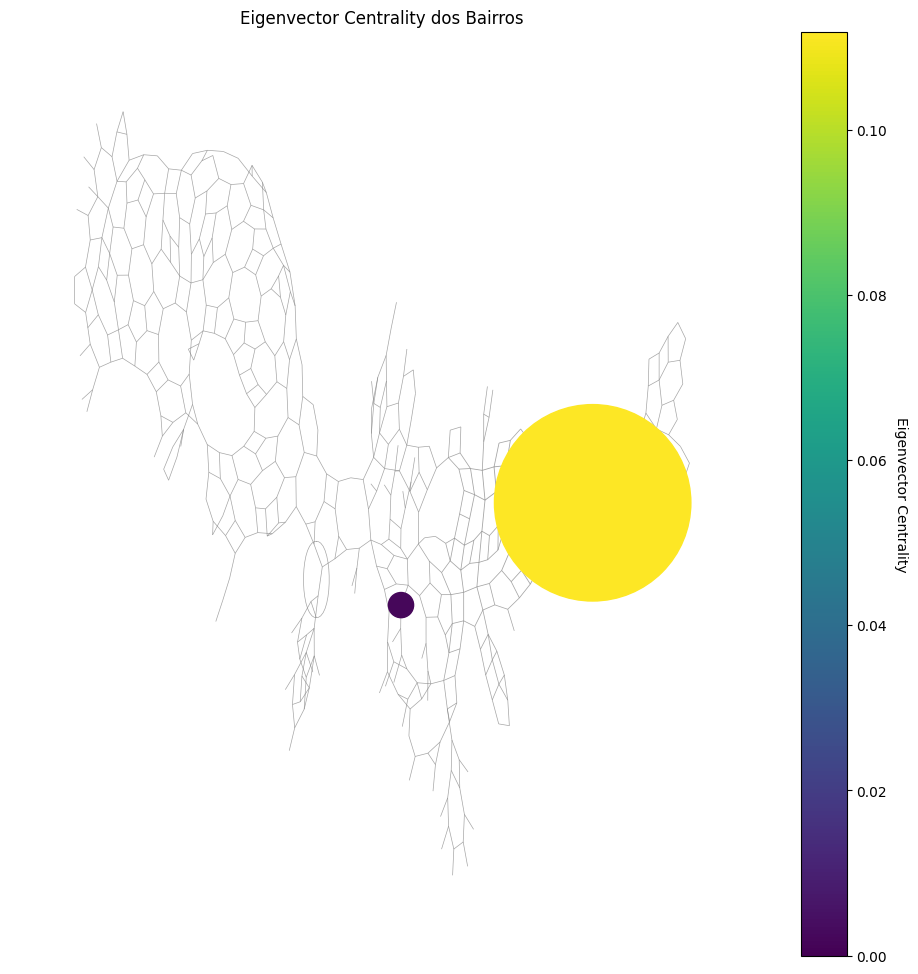

In [25]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
import osmnx as ox

# Specify the locations for your graph
bairros = ["Nova Descoberta, Natal, RN", "Potilandia, Natal, RN", "Morro Branco, Natal, RN"]

# Create the graph using osmnx
rede_bairros = ox.graph_from_place(bairros, network_type="all")
rede_bairros = rede_bairros.to_undirected()

# Convert the MultiGraph to a simple Graph
rede_bairros = nx.Graph(rede_bairros) # This line converts the MultiGraph to a simple Graph

# 1. Encontrar os nós correspondentes aos bairros:
nodes_bairros = []
for bairro in bairros:
    # Use a geocodificação para encontrar as coordenadas do bairro
    gdf = ox.geocode_to_gdf(bairro)
    # Extraia as coordenadas do centroide do polígono
    centroid = gdf['geometry'].iloc[0].centroid
    # Encontre o nó mais próximo no grafo usando as coordenadas do centroide
    nearest_node = ox.nearest_nodes(rede_bairros, centroid.x, centroid.y)
    nodes_bairros.append(nearest_node)

# 2. Calcular Eigenvector Centrality apenas para os nós dos bairros:
# Increased max_iter to 500
eigenvector_centrality = nx.eigenvector_centrality(rede_bairros, max_iter=500)
eigenvector_centrality_bairros = {node: eigenvector_centrality[node] for node in nodes_bairros}

# Normalizando os valores para ajustar a visualização (tamanho e cor)
node_colors = [eigenvector_centrality_bairros.get(node, 0) for node in rede_bairros.nodes()]

# Ajustando o tamanho dos nós para melhor visualização
max_centrality = max(eigenvector_centrality_bairros.values())
node_sizes = [eigenvector_centrality_bairros.get(node, 0) * 20000 / max_centrality for node in rede_bairros.nodes()]


# Configurando a visualização com layout kamada_kawai_layout
fig, ax = plt.subplots(figsize=(12, 12))
pos = nx.kamada_kawai_layout(rede_bairros)  # Using kamada_kawai_layout for better node distribution

# Desenhando as arestas com espessura variável
edge_widths = [0.5 + (eigenvector_centrality.get(u, 0) + eigenvector_centrality.get(v, 0)) / 2 for u, v in rede_bairros.edges()]
nx.draw_networkx_edges(rede_bairros, pos, edge_color="gray", alpha=0.7, width=edge_widths, ax=ax)

# Desenhando os nós com cores de acordo com a centralidade dos bairros
nodes = nx.draw_networkx_nodes(rede_bairros, pos, node_size=node_sizes, node_color=node_colors, cmap=plt.cm.viridis, ax=ax)

# Creating a ScalarMappable for the colorbar
sm = mpl.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=min(node_colors), vmax=max(node_colors)))
sm.set_array([])  # Necessary to avoid errors with the ScalarMappable

# Adding the colorbar
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label('Eigenvector Centrality', rotation=270, labelpad=15)


plt.title("Eigenvector Centrality dos Bairros")
plt.axis("off")
plt.savefig('eigenvector_centrality_bairros.png') # Added filename to save the plot
plt.show()

# Exibindo os valores de Eigenvector Centrality dos bairros:


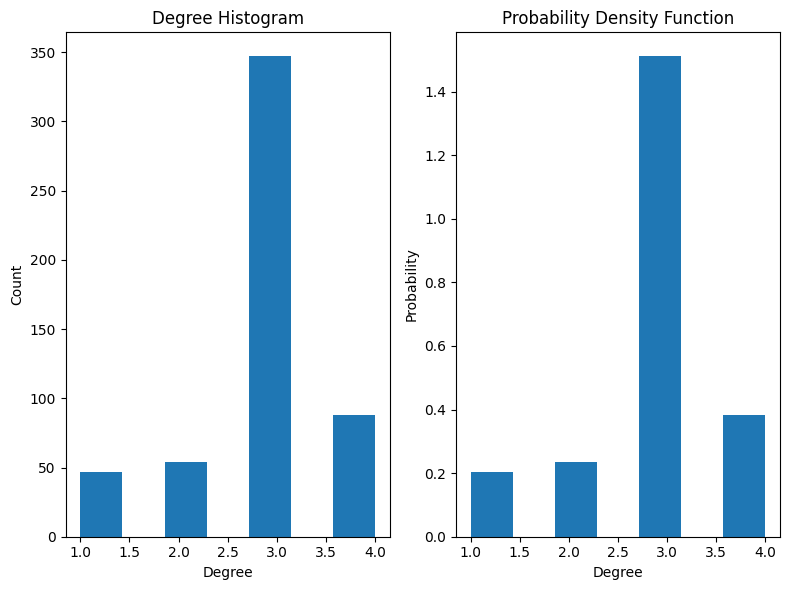

In [39]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
import osmnx as ox
import numpy as np
import collections

bairros = ["Nova Descoberta, Natal, RN", "Potilandia, Natal, RN", "Morro Branco, Natal, RN"]

# --- Análise da CDF e PDF dos graus dos nós ---

plt.style.use("default")  # Set the style

degree_sequence = sorted([d for n, d in rede_bairros.degree()], reverse=True)

fig, ax = plt.subplots(1, 2, figsize=(8, 6))

# Histogram (Count)
all_data = ax[0].hist(degree_sequence, bins=7)  # Adjust bins as needed
ax[0].set_title("Degree Histogram")
ax[0].set_ylabel("Count")
ax[0].set_xlabel("Degree")

# Probability Density Function (PDF)
ax[1].hist(degree_sequence, bins=7, density=True)  # Adjust bins as needed
ax[1].set_title("Probability Density Function")
ax[1].set_ylabel("Probability")
ax[1].set_xlabel("Degree")

plt.tight_layout()
plt.show()

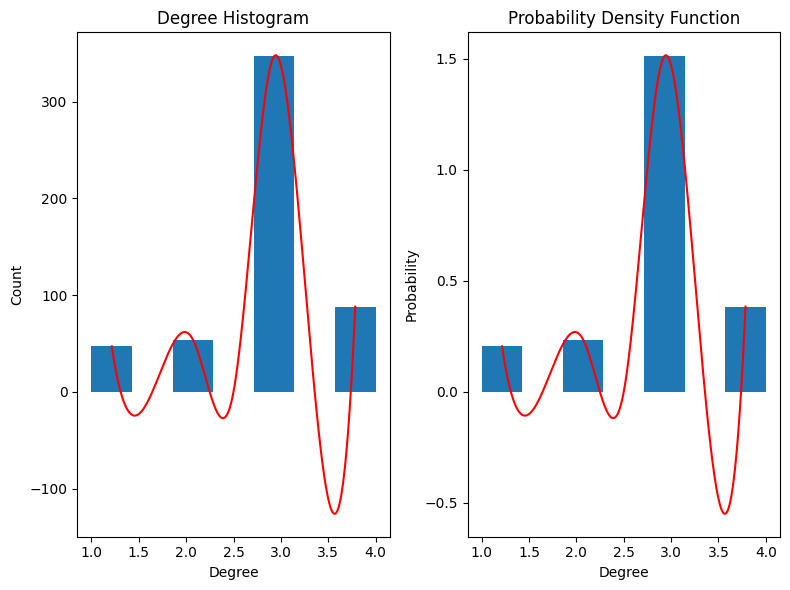

In [49]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
import osmnx as ox
import numpy as np
import collections
from scipy.interpolate import make_interp_spline  # Import make_interp_spline

bairros = ["Nova Descoberta, Natal, RN", "Potilandia, Natal, RN", "Morro Branco, Natal, RN"]

# --- Análise da CDF e PDF dos graus dos nós ---

plt.style.use("default")  # Set the style

degree_sequence = sorted([d for n, d in rede_bairros.degree()], reverse=True)

fig, ax = plt.subplots(1, 2, figsize=(8, 6))

# Histogram (Count)
all_data = ax[0].hist(degree_sequence, bins=7)  # Adjust bins as needed
ax[0].set_title("Degree Histogram")
ax[0].set_ylabel("Count")
ax[0].set_xlabel("Degree")

# Adicionando linha de curva vermelha no histograma (com interpolação spline)
hist_data = all_data[0]
bin_centers = all_data[1][:-1] + np.diff(all_data[1]) / 2
spline = make_interp_spline(bin_centers, hist_data, k=3)  # Create spline object (k=3 for cubic spline)
x_smooth = np.linspace(bin_centers.min(), bin_centers.max(), 300)  # Generate more x-values
y_smooth = spline(x_smooth)  # Calculate y-values using the spline
ax[0].plot(x_smooth, y_smooth, color='red')


# Probability Density Function (PDF)
all_data = ax[1].hist(degree_sequence, bins=7, density=True)  # Adjust bins as needed
ax[1].set_title("Probability Density Function")
ax[1].set_ylabel("Probability")
ax[1].set_xlabel("Degree")

# Adicionando linha de curva vermelha no PDF (com interpolação spline)
hist_data = all_data[0]
bin_centers = all_data[1][:-1] + np.diff(all_data[1]) / 2
spline = make_interp_spline(bin_centers, hist_data, k=3)  # Create spline object
x_smooth = np.linspace(bin_centers.min(), bin_centers.max(), 300)  # Generate more x-values
y_smooth = spline(x_smooth)  # Calculate y-values using the spline
ax[1].plot(x_smooth, y_smooth, color='red')

plt.tight_layout()
plt.show()

In [50]:
import pandas as pd

# ... (código anterior para calcular as centralidades: degree_centrality, closeness_centrality, betweenness_centrality, eigenvector_centrality) ...

# Criar um dicionário com os dados das centralidades
data = {
    'Degree': degree_centrality,
    'Closeness': closeness_centrality,
    'Betweenness': betweenness_centrality,
    'Eigenvector': eigenvector_centrality
}

# Criar o DataFrame
df_centrality = pd.DataFrame(data)

# Definir os IDs dos nós como índice
df_centrality.index.name = 'NodeID'

# Exibir o DataFrame
print(df_centrality.head())

             Degree  Closeness  Betweenness   Eigenvector
NodeID                                                   
383996758  0.007477   0.035407     0.035817  4.967710e-03
500968851  0.005607   0.036619     0.006598  1.038382e-12
501087374  0.005607   0.043278     0.007079  2.499540e-11
501087462  0.005607   0.060079     0.072907  9.940212e-07
501087579  0.005607   0.044066     0.005447  2.893499e-11


In [51]:
correlation_matrix = df_centrality.corr()
print("\nMatriz de Correlação:")
print(correlation_matrix)


Matriz de Correlação:
               Degree  Closeness  Betweenness  Eigenvector
Degree       1.000000   0.142796     0.269865     0.359527
Closeness    0.142796   1.000000     0.445833    -0.002829
Betweenness  0.269865   0.445833     1.000000     0.103595
Eigenvector  0.359527  -0.002829     0.103595     1.000000


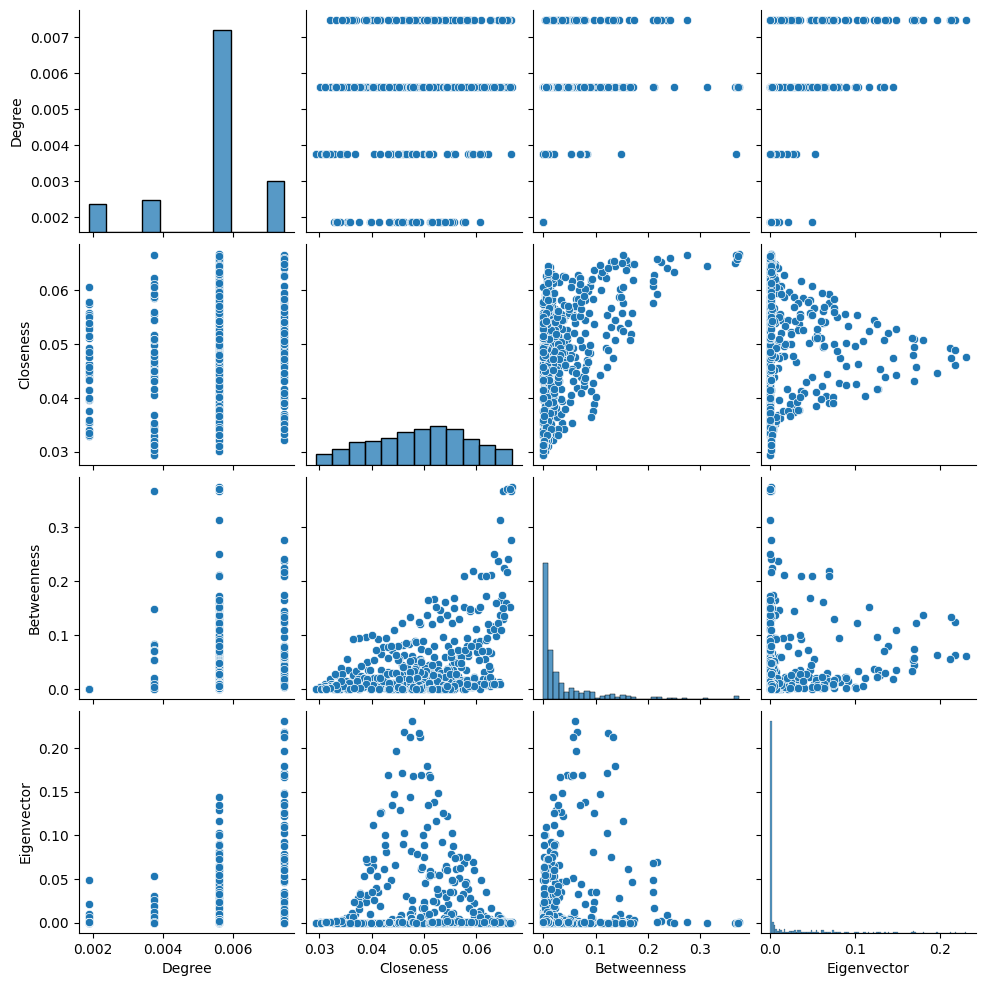

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df_centrality)
plt.show()

Nós do Core: []
Nós do Shell: [383996758, 501087462, 501620424, 502752731, 502752733, 502752735, 503422490, 503422492, 503426450, 503426452, 503787926, 503787929, 503787930, 503787944, 503787994, 503787997, 503788009, 503792726, 503792727, 504792498, 504792499, 504792500, 504792502, 504792504, 504792508, 504792512, 504792517, 504792519, 504792521, 504793689, 504793691, 504793695, 504793698, 504793700, 504793705, 504793712, 504793715, 504793720, 504793724, 504796561, 504796572, 504799443, 504799458, 504799466, 504800076, 504800077, 504800079, 504800080, 504800081, 504800082, 504800083, 504800084, 504800085, 504800086, 504800088, 504800089, 504800090, 504800091, 504800097, 504800100, 504801615, 504801617, 504801618, 504801619, 504801640, 504801641, 504801815, 504801817, 504801818, 504801827, 504801838, 504801841, 504801842, 505104141, 505108692, 505108703, 505108743, 509902726, 526588739, 526588740, 526588741, 526588744, 526588745, 526588746, 526588748, 526588757, 526588762, 526588766, 5

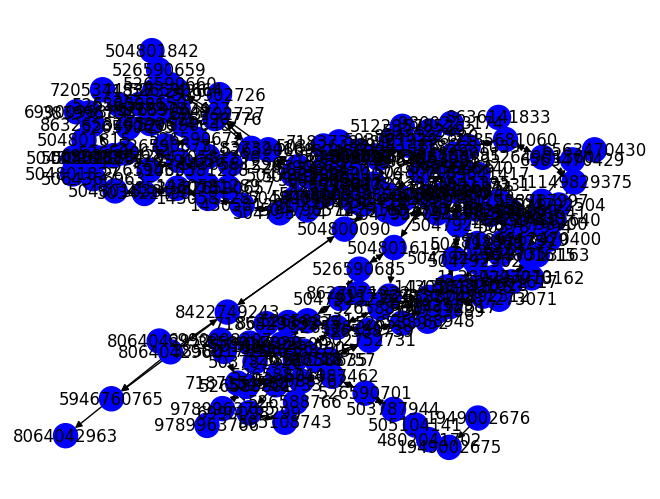

In [62]:
import networkx as nx
import matplotlib.pyplot as plt
import osmnx as ox

# Define the place to download the street network from
place = "Nova Descoberta, Natal, RN"

# Download the street network using osmnx
rede_bairros = ox.graph_from_place(place, network_type="drive")

# Remove self-loops from the graph
rede_bairros.remove_edges_from(nx.selfloop_edges(rede_bairros))

# Convert the MultiDiGraph to a simple Graph
rede_bairros_simple = nx.Graph(rede_bairros) # Convert to simple graph

# Calculate the k-core for each node using the simple graph
core_numbers = nx.core_number(rede_bairros_simple)

# Define a threshold to separate core and shell nodes
core_threshold = 3  # For example, nodes with k-core >= 3 belong to the core

# Identify core and shell nodes
core_nodes = [node for node, core in core_numbers.items() if core >= core_threshold]
shell_nodes = [node for node, core in core_numbers.items() if core < core_threshold]

# Print the core and shell nodes
print("Nós do Core:", core_nodes)
print("Nós do Shell:", shell_nodes)

# Visualize core and shell nodes (using the original MultiDiGraph for visualization)
nx.draw(
    rede_bairros,
    with_labels=True,
    node_color=['red' if node in core_nodes else 'blue' for node in rede_bairros.nodes()],
)
plt.show()